### Lesson: Writing Good Code

In [ ]:
#Lecture about good coding practice

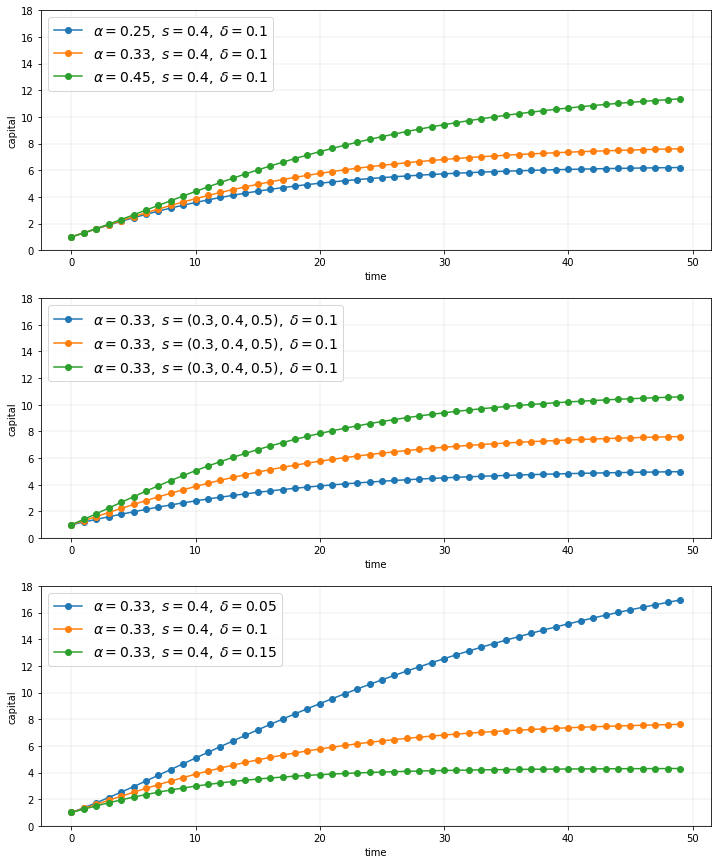

In [2]:
#An example of a bad code

#Based on the Solow model time series creation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Allocate memory for time series
k = np.empty(50)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Trajectories with different α
δ = 0.1
s = 0.4
α = (0.25, 0.33, 0.45)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α[j] + (1 - δ) * k[t]
    axes[0].plot(k, 'o-', label=rf"$\alpha = {α[j]},\; s = {s},\; \delta={δ}$")

axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different s
δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s[j] * k[t]**α + (1 - δ) * k[t]
    axes[1].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ}$")

axes[1].grid(lw=0.2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].set_ylim(0, 18)
axes[1].legend(loc='upper left', frameon=True, fontsize=14)

# Trajectories with different δ
δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α + (1 - δ[j]) * k[t]
    axes[2].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ[j]}$")

axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].grid(lw=0.2)
axes[2].legend(loc='upper left', frameon=True, fontsize=14)

plt.show()

#### Advices:

* Don’t Use Magic Numbers - means it's better to create a variable and keep it as storage. That way the code becomes more understandable

* Don’t Repeat Yourself - there are douplications in code in the places of time series generation. Reference: [here](https://code.tutsplus.com/tutorials/3-key-software-principles-you-must-understand--net-25161)

* Minimize Global Variables [More on that](http://wiki.c2.com/?GlobalVariablesAreBad). Aditionally, global variables severely slow down the JIT compilation.


##### Notes on the reference ofre code duplication

* Every piece of knowledge must have a single, unambiguous, authoritative representation within a system.

* Make a visual hierarchy of your software application and map the main components to it

* "When you find yourself writing code that is similiar or equal to something you've written before, take a moment to think about what you're doing and don't repeat yourself."


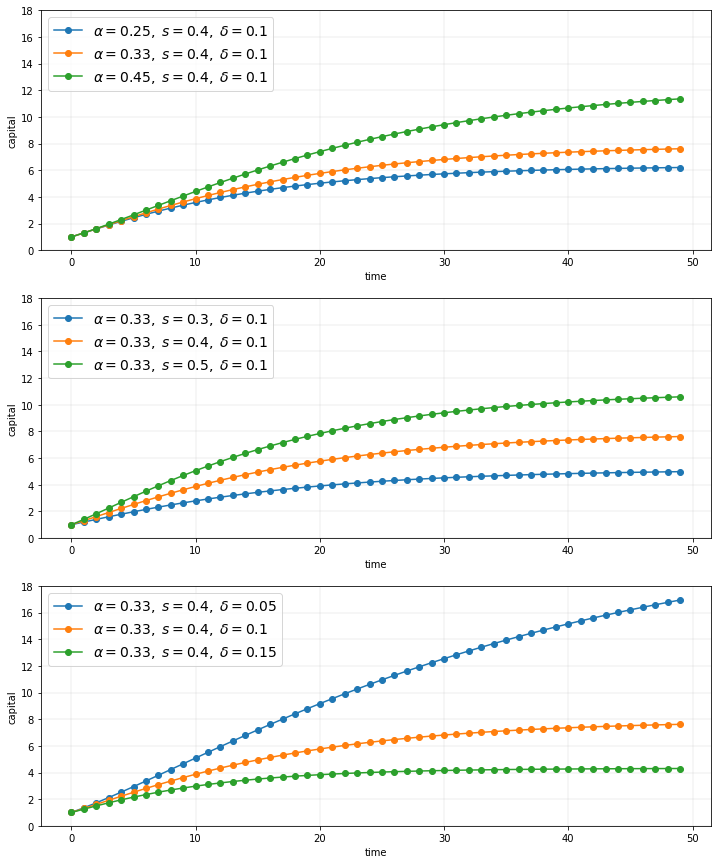

In [3]:
#Rewritten code

from itertools import product

def plot_path(ax, αs, s_vals, δs, series_length=50):
    """
    Add a time series plot to the axes ax for all given parameters.
    """
    k = np.empty(series_length)

    for (α, s, δ) in product(αs, s_vals, δs):
        k[0] = 1
        for t in range(series_length-1):
            k[t+1] = s * k[t]**α + (1 - δ) * k[t]
        ax.plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta = {δ}$")

    ax.grid(lw=0.2)
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Parameters (αs, s_vals, δs)
set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    αs, s_vals, δs = params
    plot_path(ax, αs, s_vals, δs)

plt.show()